# Exercise 1 - Various SVM kernels
## Imports

In [1]:
import numpy as np

# So that changes to the a2 model are reflected here.
import a3
import importlib
importlib.reload(a3)
import a3
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

## Functions

In [2]:
def grid_search_plot(params: dict, title):
    # Plot classified data.
    colors = {9:'red', 3:'green', 5:'blue', 1:'purple'}
    cmaps = {9:'Reds', 3:'Greens', 5:'Blues', 1:'Purples'}

    plt.figure(figsize=(10,7))

    # Scatter plot each class separately
    for num in y_e:
        X1_class, X2_class = X[y == num, 0], X[y == num, 1]
        plt.scatter(X1_class, X2_class, c=[colors[num]]*X1_class.size)

    # Perform grid search for best model of each class for one-vs-all.
    best_params = {}
    for k in y_e:
        grid = GridSearchCV(SVC(), params, n_jobs=-1)
        grid.fit(X, y_e[k])
        clf = grid.best_estimator_
        best_params[k] = grid.best_params_

        # Plot decision boundaries.
        plot_boundaries(clf, cmaps[k])

    # Add information to graph.
    plt.title(title)
    plt.legend(colors)

    # Display best parameters
    for k in best_params:
        print(f"Class {k} best parameters:", best_params[k])

def plot_boundaries(clf: SVC, cmap: str):

    # Prepare meshgrid.
    x_min, x_max, x_step = -10, 3, 0.05
    y_min, y_max, y_step = -8, 6, 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

    # Predict response for each point on meshgrid.
    zz = np.zeros(xx.shape)
    for i in range(zz.shape[0]):
        for j in range(zz.shape[1]):
            test = np.array([[xx[i,j], yy[i,j]]])
            zz[i, j] = clf.predict(test)

    plt.contour(xx, yy, zz, alpha=0.4, cmap=cmap, linewidths=3)

## Part 1 - Load & plot dataset

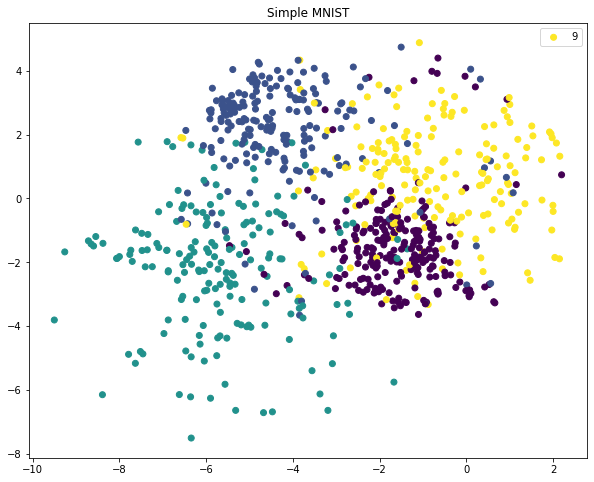

In [3]:
# Load data from "mnistsub.csv".
data = np.loadtxt("datasets/mnistsub.csv", delimiter=",")
X, y = data[:, 0:2], data[:, 2]
X1, X2 = X[:, 0], X[:, 1]

# Plot data.
plt.figure(figsize=(10,8))
plt.scatter(X1, X2, c=y, cmap='viridis')
plt.title("Classified data without boundaries")
colors = {9:'red', 3:'green', 5:'blue', 1:'purple'}
plt.legend(colors)
plt.title("Simple MNIST")
plt.show()

## Part 2 - Linear SVM

Class 1.0 best parameters: {'C': 0.1, 'kernel': 'linear'}
Class 3.0 best parameters: {'C': 0.1, 'kernel': 'linear'}
Class 5.0 best parameters: {'C': 10, 'kernel': 'linear'}
Class 9.0 best parameters: {'C': 0.1, 'kernel': 'linear'}


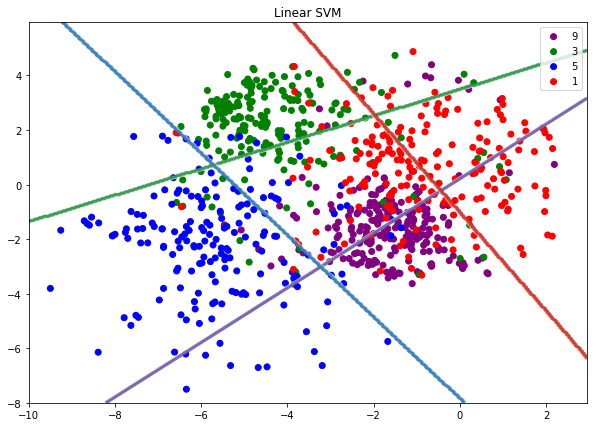

In [4]:
# Prepare params for grid search.
params = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear'],
}

# Extend y for one-vs-all.
y_e = a3.one_vs_all_parser(y)

# Apply grid search and plot models.
grid_search_plot(params, "Linear SVM")
plt.show()

## Part 3 - Gaussian SVM (RBF)

Class 1.0 best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Class 3.0 best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Class 5.0 best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Class 9.0 best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


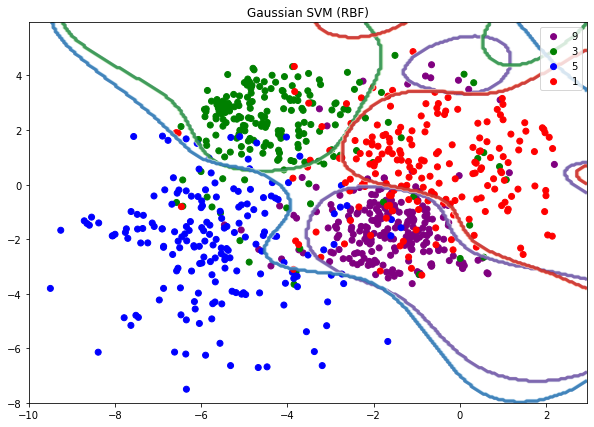

In [10]:
# Prepare params for grid search.
params = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'],
    'kernel' : ['rbf'],
}

# Extend y for one-vs-all.
y_e = a3.one_vs_all_parser(y)

# Apply grid search and plot models.
grid_search_plot(params, "Gaussian SVM (RBF)")
plt.show()

## Part 4 - Polynomial SVM

Class 1.0 best parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}
Class 3.0 best parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}
Class 5.0 best parameters: {'C': 10, 'degree': 3, 'kernel': 'poly'}
Class 9.0 best parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}


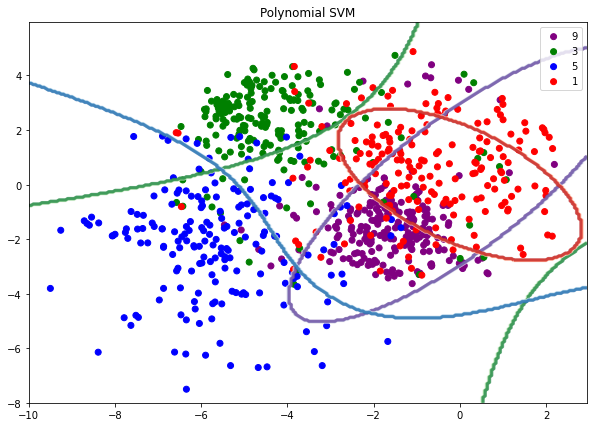

In [6]:
# Prepare params for grid search.
params = {
    'C' : [0.1, 1, 10, 100],
    'degree' : [2, 3, 4, 5],
    'kernel' : ['poly'],
}

# Extend y for one-vs-all.
y_e = a3.one_vs_all_parser(y)

# Apply grid search and plot models.
grid_search_plot(params, "Polynomial SVM")
plt.show()